#Project: Linear Regression from Scratch using NumPy arrays

In [51]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import copy
import math
%matplotlib inline

#Step 1: Loading Data and converting from pandas series -> numpy array

In [52]:
data = pd.read_csv(r"C:\Users\chaak\Downloads\Salary_dataset.csv")

In [40]:
x_raw = data["YearsExperience"]
y_raw = data["Salary"]

In [41]:
x_train = x_raw.values.reshape(-1, 1)
y_train = y_raw.values.reshape(-1, 1)

#Step 2: Data visualization using scatter plot

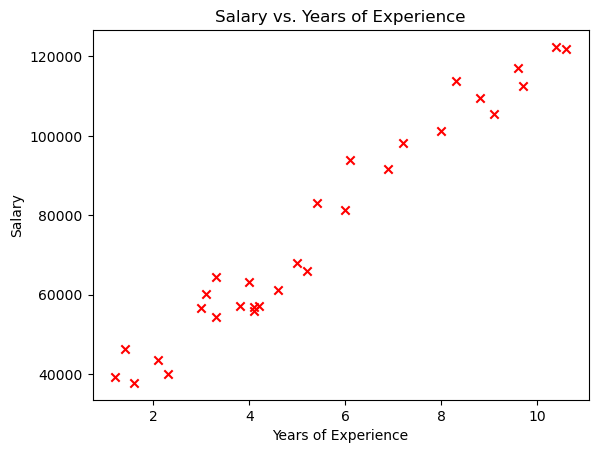

In [42]:
plt.scatter(x_train, y_train, marker = 'x', c='r')
plt.title("Salary vs. Years of Experience")
plt.ylabel("Salary")
plt.xlabel("Years of Experience")
plt.show()

#Step 3: Creating a Cost Function to analyze error
$$
    f_{wb}(x^{(i)}) =  wx^{(i)} + b 
    $$

$$cost^{(i)} =  (f_{wb} - y^{(i)})^2$$
$$J(\mathbf{w},b) = \frac{1}{2m} \sum\limits_{i = 0}^{m-1} cost^{(i)}$$


In [43]:
def compute_cost(x, y, w, b):
    m = x.shape[0]
    cost = 0
    for i in range(m):
        cost += ((w*x[i] + b) - y[i])**2

    cost = (cost) / (2*m)
    return cost
        

#Step 4: Creating Gradient Descent function to optimize weights

$$\begin{align*}& \text{repeat until convergence:} \; \lbrace \newline \; & \phantom {0000} b := b -  \alpha \frac{\partial J(w,b)}{\partial b} \newline       \; & \phantom {0000} w := w -  \alpha \frac{\partial J(w,b)}{\partial w} \tag{1}  \; & 
\newline & \rbrace\end{align*}$$

$$
\frac{\partial J(w,b)}{\partial b}  = \frac{1}{m} \sum\limits_{i = 0}^{m-1} (f_{w,b}(x^{(i)}) - y^{(i)}) \tag{2}
$$
$$
\frac{\partial J(w,b)}{\partial w}  = \frac{1}{m} \sum\limits_{i = 0}^{m-1} (f_{w,b}(x^{(i)}) -y^{(i)})x^{(i)} \tag{3}
$$

First Function will compute the gradient of J:

In [44]:
def compute_gradient(x, y, w, b):
    m = x.shape[0]
    dj_dw = 0
    dj_db = 0

    for i in range(m):
        dj_dw += ((w*x[i] + b) - y[i]) * x[i]
        dj_db += ((w*x[i] + b) - y[i])
        
    dj_dw = dj_dw / m
    dj_db = dj_db / m

    return dj_dw, dj_db

This function will optimize weights using batch gradient descent:

In [45]:
#Parameters: (X data, Y data, W initail, B initial, cost func, grad func, learning curve, iterations)
def gradient_descent(x, y, w_in, b_in, cost_function, grad_function, lr, num_iters):
    m = x.shape[0]

    #Array to store cost J and weight's w at each iteration (used for graphing)
    J_runs = []
    w_runs = []
    w = copy.deepcopy(w_in)
    b = b_in
    
    for i in range(num_iters):
        dj_dw, dj_db = grad_function(x,y,w,b)
        w = w - (lr * dj_dw)
        b = b - (lr * dj_db)

        #Saves Cost J at each iteration
        if i < 100000:       #prevent resource exhaustion
            cost = cost_function(x,y,w,b)
            J_runs.append(cost)

        #prints cost every 10 intervals
        if i % math.ceil(num_iters / 10) == 0:
            w_runs.append(w)
            #print("J_runs[-1] =", J_runs[-1])
            #print("Shape:", np.shape(J_runs[-1]))
            cost_to_print = np.mean(J_runs[-1])  
            print(f"Iteration {i:4}: Cost {cost_to_print:8.2f}")

            #print(f"Iteration {i:4}: Cost {J_runs[-1].item():8.2f}")




    return w, b, J_runs, w_runs

Now with all the functions defined, we can begin training by choosing random weights, and adjusting the learning curve as needed to ensure the cost converges

In [46]:
initial_w = 0
initial_b = 0

iterations = 1500
alpha = 0.01


w,b,_,_ = gradient_descent(x_train ,y_train, initial_w, initial_b, 
                     compute_cost, compute_gradient, alpha, iterations)
print("w,b found by gradient descent:", w, b)

Iteration    0: Cost 1297963218.56
Iteration  150: Cost 45381207.51
Iteration  300: Cost 31682912.19
Iteration  450: Cost 24292859.57
Iteration  600: Cost 20306022.06
Iteration  750: Cost 18155174.94
Iteration  900: Cost 16994820.83
Iteration 1050: Cost 16368824.83
Iteration 1200: Cost 16031108.12
Iteration 1350: Cost 15848914.33
w,b found by gradient descent: [9604.00088843] [23798.65974533]


We can now use the final parameters from the gradietn descent to plot the linear fit.
To calculate predictions on the entire dataset, we can loop through all the training examples and calculate the prediction for each example:

In [47]:
#Extract the scalar values from w and b arrays
w_scalar = w.item()
b_scalar = b.item()

m = x_train.shape[0]
predicted = np.zeros(m)

for i in range(m):
    predicted[i] = w_scalar * x_train[i].item() + b_scalar


Here is the plot of the predicted values to see the linear fit:

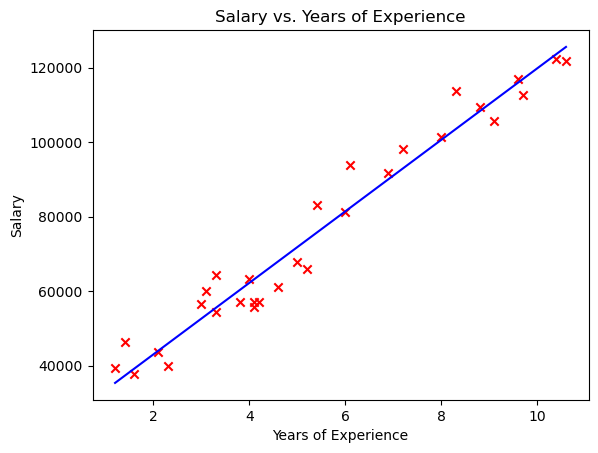

In [50]:
plt.plot(x_train, predicted, c = "b")
plt.scatter(x_train, y_train, marker = 'x', c='r')
plt.title("Salary vs. Years of Experience")
plt.ylabel("Salary")
plt.xlabel("Years of Experience")
plt.show()

In [49]:
predict4 =  w*4 + b
print(f'With 4 years of experience, your expected salary is: ${round(predict4.item(), 2)}')

With 4 years of experience, your expected salary is: $62214.66


## Conclusion

The linear regression model performed effectively in estimating salaries based on years of experience. The gradient descent algorithm successfully minimized the cost function, resulting in a model with well-fitted parameters.

While the current model captures a strong linear relationship, it can be further improved by extending it to a multivariable linear regression. Incorporating additional factors such as education level, industry, job location, and certifications could provide a more accurate and realistic salary prediction model.

This project helped reinforce core ML concepts such as loss functions, gradient descent, and model evaluation — all implemented from scratch using only NumPy.
